In [48]:
import numpy as np                # Sayısal işlemler için
import pandas as pd               # Veri okuma ve düzenleme için
from sklearn.model_selection import train_test_split   # Eğitim/test ayrımı için
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis= 1).astype("float64")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [89]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn import model_selection 

In [91]:
pls_model = PLSRegression(n_components = 2).fit(X_train,y_train)


In [93]:
pls_model.coef_

array([[ 2.47335600e-01,  1.13030348e+00,  2.08295898e+00,
         1.58599864e+00,  1.20781837e+00,  1.91015780e+00,
         3.55673082e+00,  1.21724059e-02,  4.94616408e-02,
         2.58964530e-01,  9.96443520e-02,  9.25548551e-02,
         9.84366218e-02,  1.77753399e-01,  4.68377973e-02,
        -1.43965788e-01,  3.51398888e+01, -7.43195797e+01,
         2.93829559e+01]])

In [95]:
from sklearn.metrics import mean_squared_error , r2_score 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt

In [97]:
y_pred = pls_model.predict(X_train)   

In [99]:
np.sqrt(mean_squared_error(y_train,y_pred))     

310.1167593109696

In [101]:
np.mean(pls_model.predict(X_train))

543.4834416243656

In [103]:
r2_score(y_train,y_pred)

0.5140424486535481

In [105]:
y_pred = pls_model.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

### Model Tuning

### CV

In [124]:
cv_10 = model_selection.KFold(n_splits = 10,shuffle =True, random_state = 1)

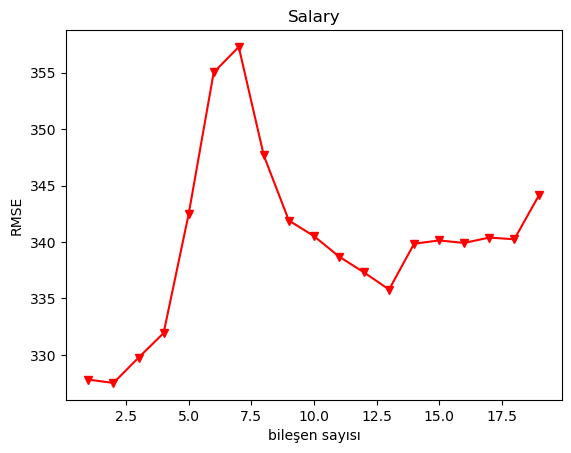

In [113]:
RMSE = []
for i in np.arange(1,X_train.shape[1] + 1):
    pls = PLSRegression(n_components = i)
    score = np.sqrt(-1*cross_val_score(pls,X_train,y_train,cv = cv_10,scoring = "neg_mean_squared_error")).mean()
    RMSE.append(score)
    
plt.plot(np.arange(1,X_train.shape[1] +1),np.array(RMSE), "-v", c= "r")
plt.xlabel("bileşen sayısı")
plt.ylabel("RMSE")
plt.title("Salary");

In [114]:
pls_model = PLSRegression(n_components = 2).fit(X_train,y_train)

In [117]:
y_pred = pls_model.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526